### 평가 데이터 기반의 음식물쓰레기 배출량의 예측 정확도 및 배출량 감소방안
#### 읍면동별 음식물 쓰레기 7, 8월 배출량(g) 소수점 첫째자리까지
※ 최종점수는 예측 정확도와 배출량 감소 방안을 통합하여 산정

#### - 음식물 쓰레기 (food_waste)
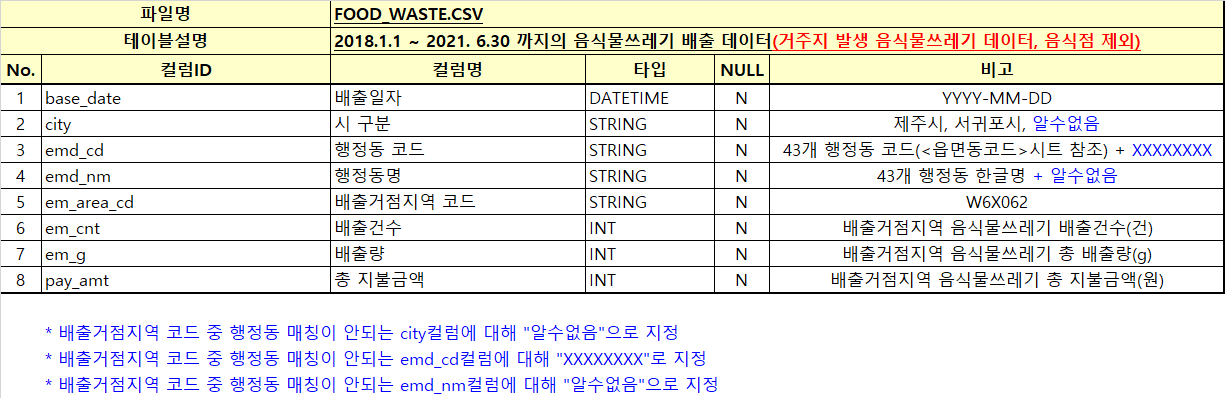

#### - 내국인 유동인구 (korean)
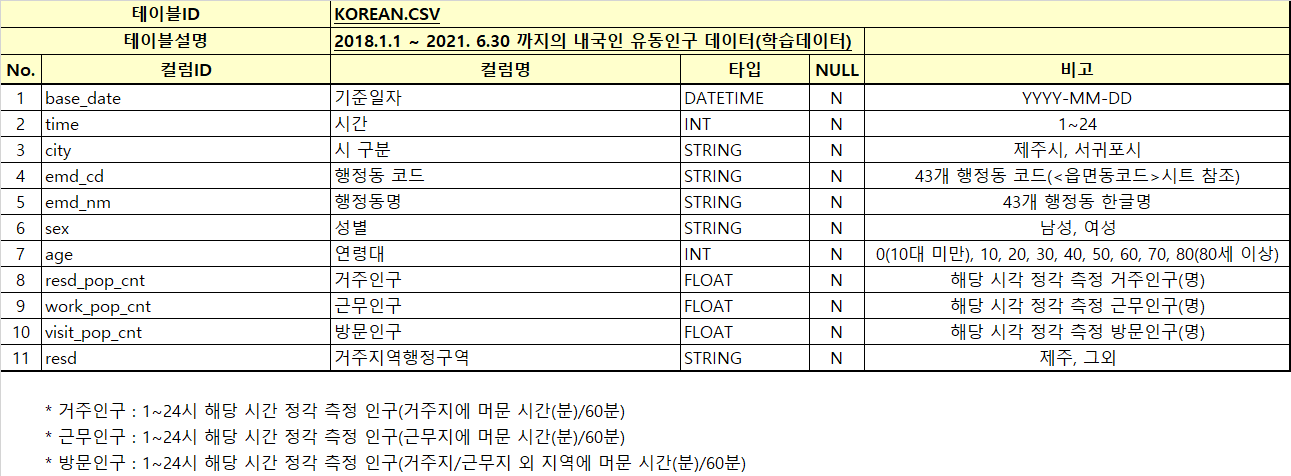

#### - 장기체류 외국인 유동인구 (long_term_frgn)
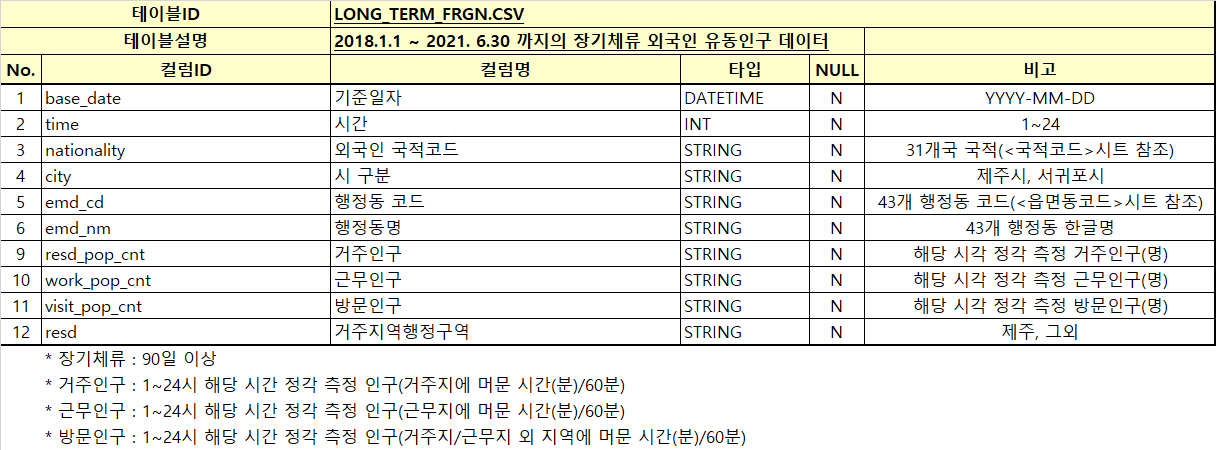

#### - 단기체류 외국인 유동인구 (short_term_frgn)
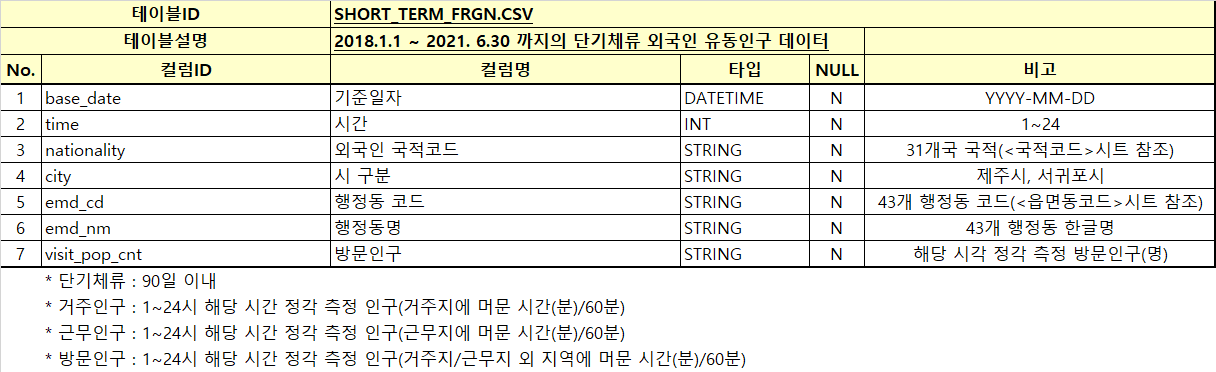

#### - 거주 인구 (resident_pop)
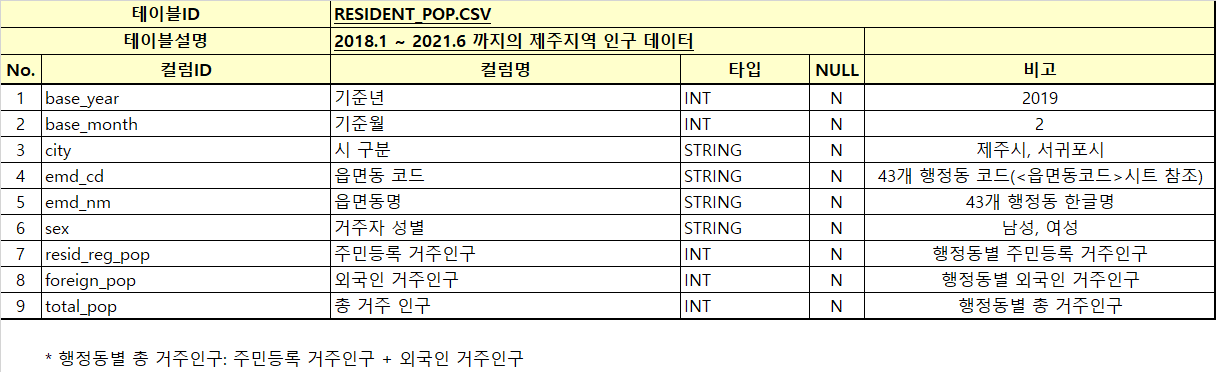

#### - 음식 관련 카드 소비 (card_spending)
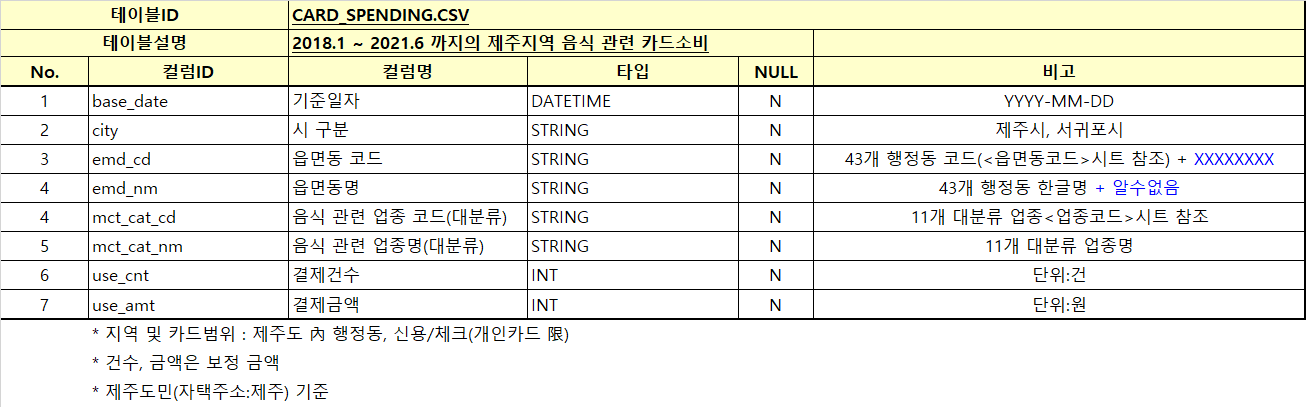

In [1]:
import pandas as pd
import numpy as np
import time

In [2]:
start = time.time()
korean = pd.read_csv("C:/users/yhg31/OneDrive/바탕 화면/데이터파일/2021빅콘테스트_제공데이터/02-1_내국인유동인구_KOREAN.csv", encoding='cp949')
print("time :", time.time() - start)

time : 177.41726398468018


In [ ]:
start = time.time()
food_waste = pd.read_csv("C:/users/yhg31/OneDrive/바탕 화면/데이터파일/2021빅콘테스트_제공데이터/01_음식물쓰레기_FOOD_WASTE.csv", encoding='cp949')
short_term_frgn = pd.read_csv("C:/users/yhg31/OneDrive/바탕 화면/데이터파일/2021빅콘테스트_제공데이터/02-3_단기체류 외국인 유동인구_SHORT_TERM_FRGN.csv", encoding='cp949')
resident_pop = pd.read_csv("C:/users/yhg31/OneDrive/바탕 화면/데이터파일/2021빅콘테스트_제공데이터/03_거주인구_RESIDENT_POP.csv", encoding='cp949')
card_spending = pd.read_csv("C:/users/yhg31/OneDrive/바탕 화면/데이터파일/2021빅콘테스트_제공데이터/04_음식관련 카드소비_CARD_SPENDING.csv", encoding='cp949')

print("time :", time.time() - start)

In [ ]:
start = time.time()
long_term_frgn = pd.read_csv("C:/users/yhg31/OneDrive/바탕 화면/데이터파일/2021빅콘테스트_제공데이터/02-2_장기체류 외국인 유동인구_LONG_TERM_FRGN.csv", encoding='cp949')
print("time :", time.time() - start)

In [ ]:
def reduce_mem_usage(df):
    """ iterate through all the columns of a dataframe and modify the data type
        to reduce memory usage.        
    """

    for col in df.columns:
        col_type = df[col].dtype

        if col_type != object:
            c_min = df[col].min()
            c_max = df[col].max()
            if str(col_type)[:3] == 'int':
                if c_min > np.iinfo(np.int8).min and c_max < np.iinfo(np.int8).max:
                    df[col] = df[col].astype(np.int8)
                elif c_min > np.iinfo(np.int16).min and c_max < np.iinfo(np.int16).max:
                    df[col] = df[col].astype(np.int16)
                elif c_min > np.iinfo(np.int32).min and c_max < np.iinfo(np.int32).max:
                    df[col] = df[col].astype(np.int32)
                elif c_min > np.iinfo(np.int64).min and c_max < np.iinfo(np.int64).max:
                    df[col] = df[col].astype(np.int64)  
            else:
                if c_min > np.finfo(np.float16).min and c_max < np.finfo(np.float16).max:
                    df[col] = df[col].astype(np.float16)
                elif c_min > np.finfo(np.float32).min and c_max < np.finfo(np.float32).max:
                    df[col] = df[col].astype(np.float32)
                else:
                    df[col] = df[col].astype(np.float64)

    return df

In [3]:
korean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 47250196 entries, 0 to 47250195
Data columns (total 11 columns):
 #   Column         Dtype  
---  ------         -----  
 0   base_date      object 
 1   time           int64  
 2   city           object 
 3   emd_cd         int64  
 4   emd_nm         object 
 5   sex            object 
 6   age            int64  
 7   resd_pop_cnt   float64
 8   work_pop_cnt   float64
 9   visit_pop_cnt  float64
 10  resd           object 
dtypes: float64(3), int64(3), object(5)
memory usage: 3.9+ GB


In [4]:
korean = reduce_mem_usage(korean)
korean.info()

NameError: name 'reduce_mem_usage' is not defined

In [ ]:
food_waste = reduce_mem_usage(food_waste)
long_term_frgn = reduce_mem_usage(long_term_frgn)
short_term_frgn = reduce_mem_usage(short_term_frgn)
resident_pop = reduce_mem_usage(resident_pop)
card_spending = reduce_mem_usage(card_spending)

In [4]:
food_waste['base_date']=pd.to_datetime(food_waste['base_date'])
korean['base_date']=pd.to_datetime(korean['base_date'])
long_term_frgn['base_date']=pd.to_datetime(long_term_frgn['base_date'])
short_term_frgn['base_date']=pd.to_datetime(short_term_frgn['base_date'])
card_spending['base_date']=pd.to_datetime(card_spending['base_date'])

NameError: name 'food_waste' is not defined

In [5]:
korean['base_date']=pd.to_datetime(korean['base_date'])

korean["base_year"] = korean['base_date'].dt.year
korean["base_month"] = korean['base_date'].dt.month

korean

,base_date,time,city,emd_cd,emd_nm,sex,age,resd_pop_cnt,work_pop_cnt,visit_pop_cnt,resd,base_year,base_month
0,2018-01-01,1,제주시,50110250,한림읍,여성,0,638.5509,15.5400,151.5149,제주,2018,1
1,2018-01-01,1,제주시,50110250,한림읍,여성,0,0.0000,3.7249,171.3458,그외,2018,1
2,2018-01-01,1,제주시,50110250,한림읍,여성,10,668.4577,17.0308,166.0500,제주,2018,1
3,2018-01-01,1,제주시,50110250,한림읍,여성,10,0.0000,4.2577,195.8539,그외,2018,1
4,2018-01-01,1,제주시,50110250,한림읍,여성,20,609.7710,5.9490,148.7246,제주,2018,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
47250191,2021-06-30,24,서귀포시,50130620,예래동,남성,20,0.0000,0.0000,599.1969,그외,2021,6
47250192,2021-06-30,24,서귀포시,50130620,예래동,남성,20,187.5990,41.9998,75.5996,제주,2021,6
47250193,2021-06-30,24,서귀포시,50130620,예래동,남성,10,121.8467,0.0000,4.5128,제주,2021,6
47250194,2021-06-30,24,서귀포시,50130620,예래동,남성,80,122.2190,0.0000,4.5032,제주,2021,6


In [6]:
#월별 쓰레기 배출량에 버리는 사람이 중요한게 아니라 양이 중요하다고 생각
df = korean
del df["resd"]
del df["sex"]
del df["age"]
del df["time"]

In [7]:
korean

,base_date,city,emd_cd,emd_nm,resd_pop_cnt,work_pop_cnt,visit_pop_cnt,base_year,base_month
0,2018-01-01,제주시,50110250,한림읍,638.5509,15.5400,151.5149,2018,1
1,2018-01-01,제주시,50110250,한림읍,0.0000,3.7249,171.3458,2018,1
2,2018-01-01,제주시,50110250,한림읍,668.4577,17.0308,166.0500,2018,1
3,2018-01-01,제주시,50110250,한림읍,0.0000,4.2577,195.8539,2018,1
4,2018-01-01,제주시,50110250,한림읍,609.7710,5.9490,148.7246,2018,1
...,...,...,...,...,...,...,...,...,...
47250191,2021-06-30,서귀포시,50130620,예래동,0.0000,0.0000,599.1969,2021,6
47250192,2021-06-30,서귀포시,50130620,예래동,187.5990,41.9998,75.5996,2021,6
47250193,2021-06-30,서귀포시,50130620,예래동,121.8467,0.0000,4.5128,2021,6
47250194,2021-06-30,서귀포시,50130620,예래동,122.2190,0.0000,4.5032,2021,6


In [8]:
df[(df["base_year"] == 2018) & (df["base_month"] == 1) & (df["emd_cd"] == 50110250)]

,base_date,city,emd_cd,emd_nm,resd_pop_cnt,work_pop_cnt,visit_pop_cnt,base_year,base_month
0,2018-01-01,제주시,50110250,한림읍,638.5509,15.5400,151.5149,2018,1
1,2018-01-01,제주시,50110250,한림읍,0.0000,3.7249,171.3458,2018,1
2,2018-01-01,제주시,50110250,한림읍,668.4577,17.0308,166.0500,2018,1
3,2018-01-01,제주시,50110250,한림읍,0.0000,4.2577,195.8539,2018,1
4,2018-01-01,제주시,50110250,한림읍,609.7710,5.9490,148.7246,2018,1
...,...,...,...,...,...,...,...,...,...
1144178,2018-01-31,제주시,50110250,한림읍,0.0000,34.2159,265.1729,2018,1
1144179,2018-01-31,제주시,50110250,한림읍,606.2593,6.1863,24.7453,2018,1
1144180,2018-01-31,제주시,50110250,한림읍,0.0000,12.3726,55.6769,2018,1
1144181,2018-01-31,제주시,50110250,한림읍,258.3575,2.3682,9.4728,2018,1


In [9]:
df_2018 = df[df["base_year"] == 2018]
df_2019 = df[df["base_year"] == 2019]
df_2020 = df[df["base_year"] == 2020]
df_2021 = df[df["base_year"] == 2021]

In [10]:
df1 = pd.pivot_table(df_2018, index = ["base_year", "base_month", "emd_cd", "emd_nm"], aggfunc = "sum")
df2 = pd.pivot_table(df_2019, index = ["base_year", "base_month", "emd_cd", "emd_nm"], aggfunc = "sum")
df3 = pd.pivot_table(df_2020, index = ["base_year", "base_month", "emd_cd", "emd_nm"], aggfunc = "sum")
df4 = pd.pivot_table(df_2021, index = ["base_year", "base_month", "emd_cd", "emd_nm"], aggfunc = "sum")

In [11]:
df4

resd_pop_cnt  visit_pop_cnt  \
base_year base_month emd_cd   emd_nm                                
2021      1          50110250 한림읍     1.541335e+07   5.076136e+06   
                     50110253 애월읍     2.772597e+07   1.307091e+07   
                     50110256 구좌읍     9.888182e+06   4.235039e+06   
                     50110259 조천읍     1.572815e+07   6.544945e+06   
                     50110310 한경면     5.462063e+06   2.270296e+06   
...                                            ...            ...   
          6          50130580 서홍동     4.845986e+06   2.327083e+06   
                     50130590 대륜동     1.029554e+07   6.014357e+06   
                     50130600 대천동     5.508175e+06   4.269129e+06   
                     50130610 중문동     7.487620e+06   4.123195e+06   
                     50130620 예래동     2.277156e+06   5.078006e+06   

                                      work_pop_cnt  
base_year base_month emd_cd   emd_nm                
2021      1          50110250 한림읍     1.119067e+06  
                     50110253 애월읍     2.178650e+06  
                     50110256 구좌읍     7.262737e+05  
                     50110259 조천읍     1.223123e+06  
                     50110310 한경면     3.504748e+05  
...                                            ...  
          6          50130580 서홍동     3.256131e+05  
                     50130590 대륜동     9.344518e+05  
                     50130600 대천동     4.764590e+05  
                     50130610 중문동     4.805422e+05  
                     50130620 예래동     6.271895e+05  

[258 rows x 3 columns]

In [12]:
 df = pd.concat([df1, df2, df3, df4])

In [13]:
df.to_csv("korean_df.csv")